In [9]:
#Generate the data set
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statistics
import math

In [49]:
def generate_data(x):
    result = []
    for i in x:
        y = 1.7*i + 6 + random.randint(-1,1) + i**3 + 2*i**2
        result.append(y)
    return result

def generate_data_mf(x,feature):
    result = []
    for i in x: #observations
        tem = 0
        for j in i[0:feature]: #features used for train
            tem += random.randint(-2,2)*j + random.randint(-2,2)*j**2
        result.append(tem #generate function
                      + 3 #coeffient
                      + random.randint(-2,2)*20*math.sin(j) #Extra pattern not in Hn
                      + random.randint(-1,1)/2) #noise
    return result
        

In [5]:
#single feature
random.seed(121)
X = [random.random()*10 for _ in range(2000)]
Y = generate_data(X)
X = np.array(X)
Y = np.array(Y)

In [50]:
#Small mltiple feature
X = [random.random()*10 for _ in range(20000)]
X = np.array(X).reshape(400,50)
Y = generate_data_mf(X,10)
Y = np.array(Y)

In [35]:
#large multiple feature
random.seed(181)
X = [random.random()*10 for _ in range(200000)]
X = np.array(X).reshape(1000,200)
Y = generate_data_mf(X,30)
Y = np.array(Y)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [52]:
def error(x,y): #x-prediction y-real
    return statistics.mean(abs(x - y))

#Ploynomial regression degress to specify the degree of the feature
def train_valid_poly(X_train, X_test, y_train, y_test, degree):
    test_error = []
    train_error = []
    for count in range(0,degree+1):
        model = Pipeline([('poly', PolynomialFeatures(count)),('linear', LinearRegression(fit_intercept=False))])
        model = model.fit(X_train[:, np.newaxis], y_train)
        test_error.append(error(model.predict(X_train[:, np.newaxis]),y_train))
        train_error.append(error(model.predict(X_test[:, np.newaxis]),y_test))
    return (test_error,train_error)

def train_valid_multipoly(X_train, X_test, y_train, y_test, feature, degree):
    test_error = []
    train_error = []
    for count in degree:
        for feature_num in range(1,feature+1):
            #get first feature_num features
            #Reshape dimensions
            X_temtrain = X_train[:,:feature_num]
            nsamples, nx, ny = X_temtrain[:, np.newaxis].shape
            X_temtrain = X_temtrain.reshape((nsamples,nx*ny))

            X_temtest = X_test[:,:feature_num]
            nsamples, nx, ny = X_temtest[:, np.newaxis].shape
            X_temtest = X_temtest.reshape((nsamples,nx*ny))

            #Train
            model = Pipeline([('poly', PolynomialFeatures(count)),('linear', LinearRegression(fit_intercept=False))])
            model = model.fit(X_temtrain, y_train)
            train_error.append(error(model.predict(X_temtrain),y_train))
            test_error.append(error(model.predict(X_temtest),y_test))

    return (test_error,train_error)
    

In [8]:
#Single feature regression
(test_error,train_error) = train_valid_poly(X_train, X_test, y_train, y_test, 130)

In [53]:
#Multiple feature regression - small features
(test_error,train_error) = train_valid_multipoly(X_train, X_test, y_train, y_test, 50, [2])

In [38]:
#Multiple feature regression - large features
(test_error,train_error) = train_valid_multipoly(X_train, X_test, y_train, y_test, 200, [2])

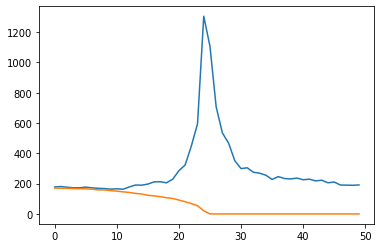

In [54]:
plt.plot(test_error) #blue
plt.plot(train_error) #red

In [55]:
print(test_error.index(min(test_error)))
print(test_error.index(max(test_error)))
print(train_error.index(min(train_error)))

11
24
46


In [62]:
print(test_error.index(min(test_error[30:])))

print(test_error[48]) #minimum after peak
print(test_error[11]) #minimum before peak

48
189.01988349983498
162.9146434175347
285.18801311635906
